In [12]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()

# 0 - Tumor
# 1 - Normal

In [14]:
data = []
labels = []

# Loading Tumor images
for r, d, f in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            img = Image.open(os.path.join(r, file)).resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(img)
                labels.append(0)  # Label 0 for Tumor

# Loading Non-Tumor images
for r, d, f in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'):
    for file in f:
        if '.jpg' in file:
            img = Image.open(os.path.join(r, file)).resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(img)
                labels.append(1)  # Label 1 for No Tumor

In [15]:
print(f"Total images loaded: {len(data)}")
print(f"Total labels loaded: {len(labels)}")


Total images loaded: 139
Total labels loaded: 139


In [16]:
data = np.array(data) / 255.0  # Normalizing images
labels = np.array(labels)

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=0)

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5391 - loss: 1.0662 - val_accuracy: 0.5357 - val_loss: 0.6674
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5668 - loss: 0.6798 - val_accuracy: 0.5357 - val_loss: 0.6802
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5633 - loss: 0.6632 - val_accuracy: 0.5714 - val_loss: 0.6722
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7263 - loss: 0.6373 - val_accuracy: 0.6786 - val_loss: 0.6286
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6729 - loss: 0.5915 - val_accuracy: 0.6071 - val_loss: 0.6055
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7248 - loss: 0.5550 - val_accuracy: 0.6786 - val_loss: 0.5980
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7154 - loss: 0.5560 - val_accuracy: 0.6429 - val_loss: 0.5943
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7372 - loss: 0.5232 - val_accuracy: 0.6429 - val_loss: 0.5831
Ep

In [19]:
# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.4292
Test Accuracy: 75.00%


In [20]:
# Evaluate model on training data
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
# Evaluate model on validation (test) data
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


Training Accuracy: 92.79%
Validation Accuracy: 75.00%
Training Loss: 0.2046
Validation Loss: 0.4292


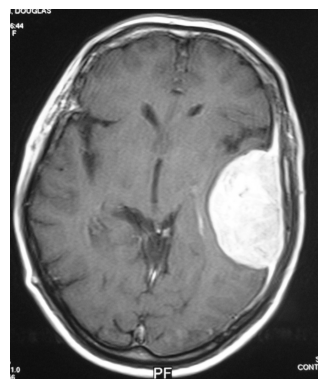

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Prediction: Tumor Detected


In [21]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image
img_path = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y103.jpg'  # Replace with a valid image path
img = Image.open(img_path)
img_resized = img.resize((128, 128))  # Resize the image to match the model's input size
img_array = np.array(img_resized) / 255.0  # Normalize the image

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Reshape the image for prediction (1, 128, 128, 3)
img_array = img_array.reshape(1, 128, 128, 3)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = int(prediction[0][0] > 0.5)  # 0 for Tumor, 1 for No Tumor

# Display result
if predicted_class == 0:
    print("Prediction: Tumor Detected")
else:
    print("Prediction: No Tumor Detected")
